In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv.zip')
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [3]:
test = pd.read_csv('test.csv.zip')
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [4]:
feature = pd.read_csv("features.csv.zip",
                      usecols=['Store', 'Date', 'Temperature', 'Fuel_Price'],
                      dtype={'Store': 'category'},
                      parse_dates=['Date'], infer_datetime_format=True)
feature

,Store,Date,Temperature,Fuel_Price
0,1,2010-02-05,42.31,2.572
1,1,2010-02-12,38.51,2.548
2,1,2010-02-19,39.93,2.514
3,1,2010-02-26,46.63,2.561
4,1,2010-03-05,46.50,2.625
...,...,...,...,...
8185,45,2013-06-28,76.05,3.639
8186,45,2013-07-05,77.50,3.614
8187,45,2013-07-12,79.37,3.614
8188,45,2013-07-19,82.84,3.737


In [5]:
store = pd.read_csv("stores.csv",
                      usecols=['Store', 'Type', 'Size'],
                      dtype={'Store': 'category', 'Type': 'category'})

store_type_mapping = {name:value for name, value in zip(store['Type'].unique(),list(range(1,len(store['Type'].unique())+1)))}
store['Type_n'] = store['Type'].apply(lambda x: store_type_mapping[x])

store.head()

,Store,Type,Size,Type_n
0,1,A,151315,1
1,2,A,202307,1
2,3,B,37392,2
3,4,A,205863,1
4,5,B,34875,2


/Users/kookhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type_n', ylabel='Size'>

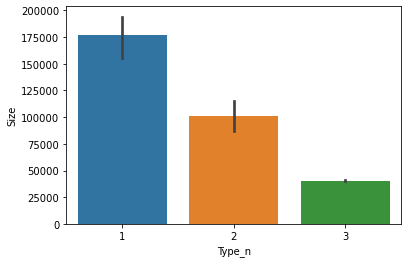

In [6]:
# Figuring out how store 'Type' is decided.

sns.barplot(store['Type_n'], store['Size'])

# According to the below plot, we can assume that 'Size' can be one of the greatest features categorizing store 'Type'

In [7]:
# Parsing date information from train data to make it as categorical data
# If there is trend in each date information, it will help to improve model accuracy

train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Week'] = train['Date'].dt.week
train['Day'] = train['Date'].dt.day

/var/folders/0v/kqc2c97564191txl9_czm7j00000gn/T/ipykernel_36819/821720762.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train['Week'] = train['Date'].dt.week


In [8]:
# Parsing date information from test data to make it as categorical data

test['Date'] = pd.to_datetime(test['Date'])
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Week'] = test['Date'].dt.week
test['Day'] = test['Date'].dt.day

/var/folders/0v/kqc2c97564191txl9_czm7j00000gn/T/ipykernel_36819/3383045673.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test['Week'] = test['Date'].dt.week


In [9]:
# Merging feature and store dataset to train and test dataset

cols = ['Store','Date']
train['Store_Date'] = train[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
test['Store_Date'] = test[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
feature['Store_Date'] = feature[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

feature_store = feature.merge(store, how = 'inner', on = 'Store')
train_complete = train.merge(feature_store, how='left', on = 'Store_Date')

test_complete = test.merge(feature_store, how='left', on = 'Store_Date')

In [10]:
train_complete

,Store_x,Dept,Date_x,Weekly_Sales,IsHoliday,Year,Month,Week,Day,Store_Date,Store_y,Date_y,Temperature,Fuel_Price,Type,Size,Type_n
0,1,1,2010-02-05,24924.50,False,2010,2,5,5,1_2010-02-05 00:00:00,1,2010-02-05,42.31,2.572,A,151315,1
1,1,1,2010-02-12,46039.49,True,2010,2,6,12,1_2010-02-12 00:00:00,1,2010-02-12,38.51,2.548,A,151315,1
2,1,1,2010-02-19,41595.55,False,2010,2,7,19,1_2010-02-19 00:00:00,1,2010-02-19,39.93,2.514,A,151315,1
3,1,1,2010-02-26,19403.54,False,2010,2,8,26,1_2010-02-26 00:00:00,1,2010-02-26,46.63,2.561,A,151315,1
4,1,1,2010-03-05,21827.90,False,2010,3,9,5,1_2010-03-05 00:00:00,1,2010-03-05,46.50,2.625,A,151315,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,2012,9,39,28,45_2012-09-28 00:00:00,45,2012-09-28,64.88,3.997,B,118221,2
421566,45,98,2012-10-05,628.10,False,2012,10,40,5,45_2012-10-05 00:00:00,45,2012-10-05,64.89,3.985,B,118221,2
421567,45,98,2012-10-12,1061.02,False,2012,10,41,12,45_2012-10-12 00:00:00,45,2012-10-12,54.47,4.000,B,118221,2
421568,45,98,2012-10-19,760.01,False,2012,10,42,19,45_2012-10-19 00:00:00,45,2012-10-19,56.47,3.969,B,118221,2


In [11]:
# Dropping duplicate columns and response variable from consolidated train dataset

train_model = train_complete.drop(columns = ['Weekly_Sales','Date_x', 'Store_Date','Store_y','Date_y','Type'])
train_model.isnull().sum()

Store_x        0
Dept           0
IsHoliday      0
Year           0
Month          0
Week           0
Day            0
Temperature    0
Fuel_Price     0
Size           0
Type_n         0
dtype: int64

In [13]:
# Function for WMAE calcuation. Formula for WMAE is given by Walmart and it will be used to evaluate the model

def WMAE(dataset, prediction):
    WMAE_evaluation = pd.DataFrame({'IsHoliday': dataset['IsHoliday'], 'Weekly_Sales' : dataset['Weekly_Sales']})
    WMAE_evaluation['Weights'] = dataset['IsHoliday'].apply(lambda x: 5 if x else 1)
    WMAE_evaluation['Prediction'] = prediction
    WMAE_evaluation['Weighted_error'] = WMAE_evaluation['Weights'] * abs(WMAE_evaluation['Weekly_Sales'] - WMAE_evaluation['Prediction'])
    WMAE_evaluation.to_csv('WMAE.csv')
    return WMAE_evaluation['Weighted_error'].sum() / WMAE_evaluation['Weights'].sum()

In [14]:
# Training with baseline train dataset and default hyperparameters

model = RandomForestRegressor(n_jobs = -1, random_state = 42)
model.fit(train_model, train['Weekly_Sales'])

train_prediction = model.predict(train_model)
WMAE(train, train_prediction)

# WMAE for this baseline model is 519.61

519.6127896172629

In [15]:
# Finding out features showing week correlation which can disturb the model's trainning 

train_corr = train_complete.drop(columns = ['Date_x', 'Store_Date','Store_y','Date_y','Type'])
abs(train_corr.corr()['Weekly_Sales']).sort_values(ascending=True)

# 'Fuel_Price' and 'Temperature' are showing significantly low correlation.
# 'Day', 'Year', and 'IsHoliday' are also showing low correlation.

# On the other hand, 'Size', 'Dept', 'Store', 'Month' and 'Week' are highly correlated to the response variable

Fuel_Price      0.000120
Temperature     0.002312
Day             0.006187
Year            0.010111
IsHoliday       0.012774
Week            0.027673
Month           0.028409
Store_x         0.085195
Dept            0.148032
Size            0.243828
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64

In [64]:
train_corr.corr()

,Store_x,Dept,Weekly_Sales,IsHoliday,Year,Month,Week,Day,Temperature,Fuel_Price,Size
Store_x,1.000000,0.024004,-0.085195,-0.000548,0.002997,0.001011,0.001031,-0.000015,-0.050097,0.065290,-0.182881
Dept,0.024004,1.000000,0.148032,0.000916,0.003738,0.000904,0.000882,-0.000678,0.004437,0.003572,-0.002966
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.010111,0.028409,0.027673,-0.006187,-0.002312,-0.000120,0.243828
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.056746,0.123376,0.128184,0.045465,-0.155949,-0.078281,0.000593
Year,0.002997,0.003738,-0.010111,-0.056746,1.000000,-0.194288,-0.181797,0.005835,0.065814,0.779633,-0.004975
Month,0.001011,0.000904,0.028409,0.123376,-0.194288,1.000000,0.995999,0.016363,0.235983,-0.040876,-0.001210
Week,0.001031,0.000882,0.027673,0.128184,-0.181797,0.995999,1.000000,0.104719,0.236276,-0.031140,-0.001292
Day,-0.000015,-0.000678,-0.006187,0.045465,0.005835,0.016363,0.104719,1.000000,0.026832,0.028058,-0.000386
Temperature,-0.050097,0.004437,-0.002312,-0.155949,0.065814,0.235983,0.236276,0.026832,1.000000,0.143859,-0.058313
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.779633,-0.040876,-0.031140,0.028058,0.143859,1.000000,0.003361


/Users/kookhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size', ylabel='Weekly_Sales'>

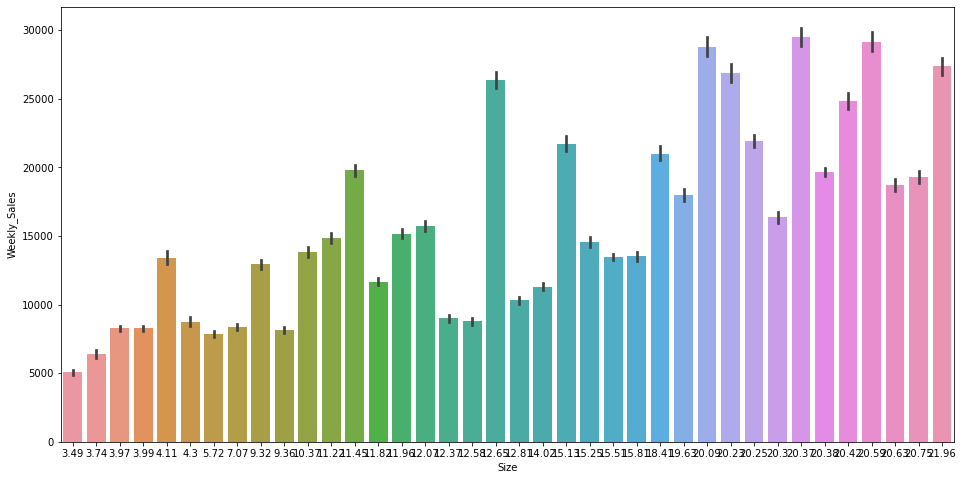

In [32]:
# Checking out data for highly correlated features first

# Drawing a bar plot for store sizes

plt.figure(figsize = (16,8))
sns.barplot(round(train_complete['Size']/10000,2), train_complete['Weekly_Sales'])

# Each store's size varies greatly in sales, and big sizes tend to show high sales

/Users/kookhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store_x', ylabel='Weekly_Sales'>

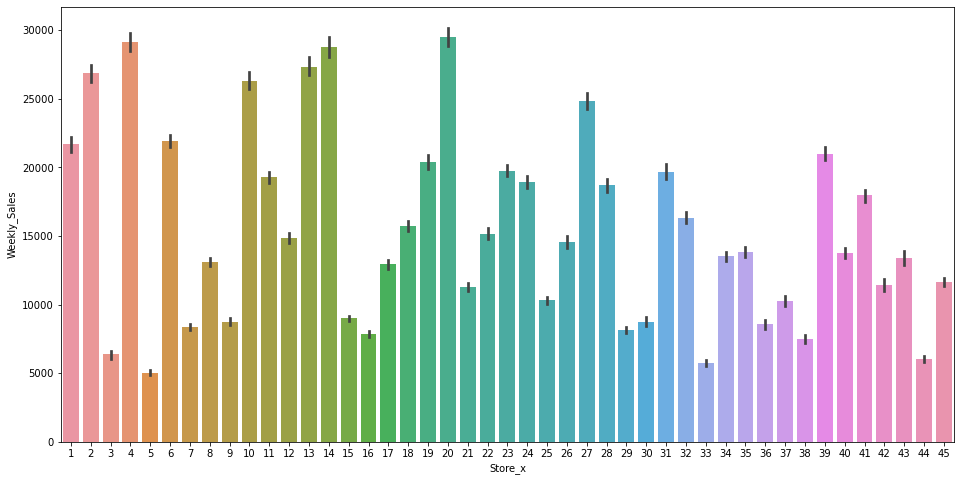

In [17]:
# Drawing a bar plot for store numbers

plt.figure(figsize = (16,8))
sns.barplot(train_complete['Store_x'], train_complete['Weekly_Sales'])

# Each store is showing different sales amount.

/Users/kookhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

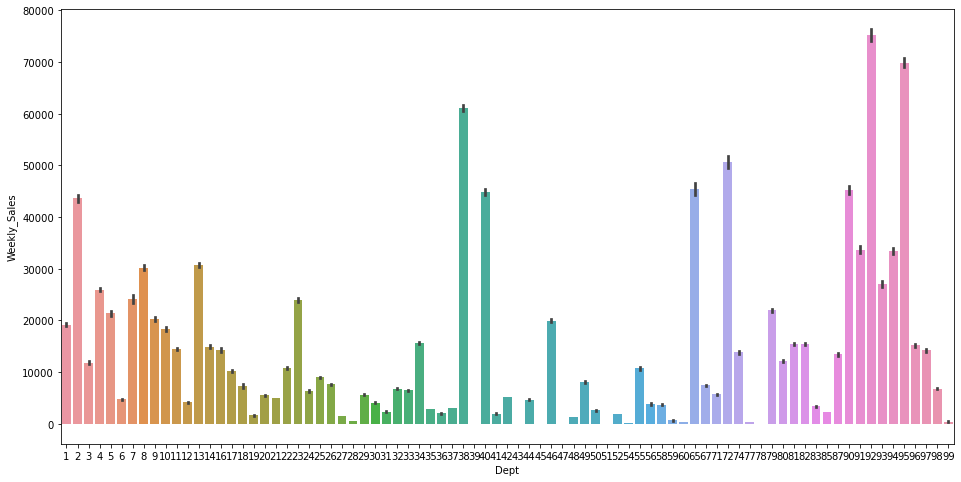

In [18]:
# Drawing a bar plot for departments

plt.figure(figsize = (16,8))
sns.barplot(train_complete['Dept'], train_complete['Weekly_Sales'])

# Each department is showing different sales amount.

/Users/kookhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Week', ylabel='Weekly_Sales'>

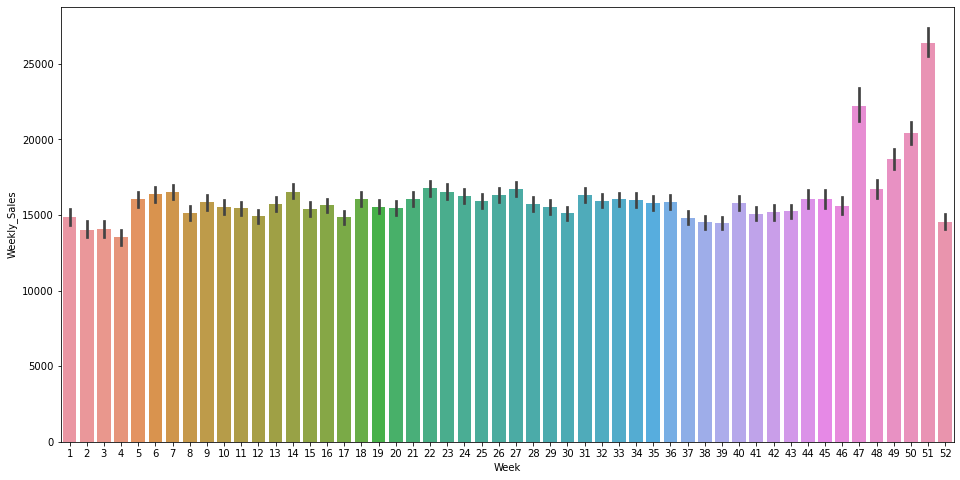

In [19]:
# Drawing a box plot for 'Week' column

plt.figure(figsize = (16,8))
sns.barplot(train_complete['Week'], train_complete['Weekly_Sales'])

# There is huge increase in sales in W47, and we can assume that this increase is due to 'Thanksgiving day'.
# In Dec, the sales increases gradually and reaches at peak in W51 which has 'Christmas day' in its period.
# The sales decreases significantly in Jan, but recovered in Feb as there is 'Super Bowl'.

/Users/kookhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

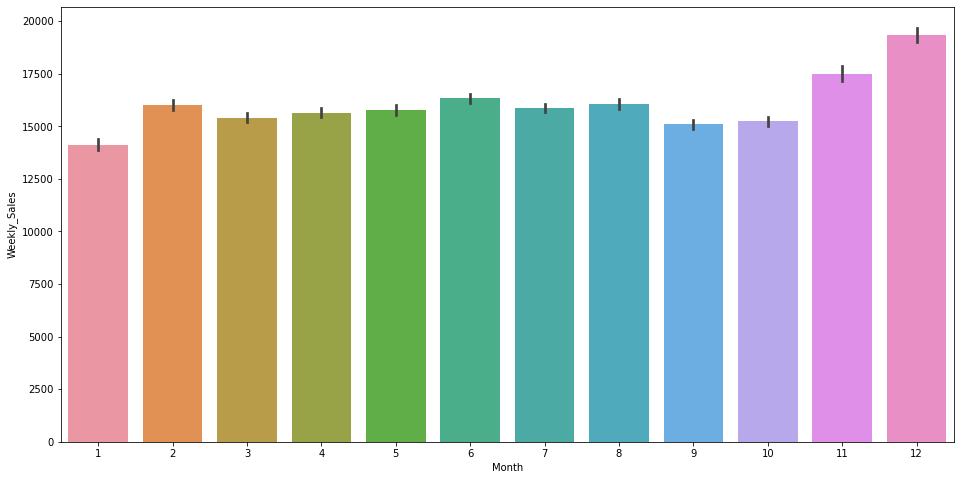

In [30]:
# Drawing a box plot for 'Month' column

plt.figure(figsize = (16,8))
sns.barplot(train_complete['Month'], train_complete['Weekly_Sales'])

# The monthly trend is similar to weekly trend. 
# Increases are found in Nov, Dec, and Feb compared to their previous month.

/Users/kookhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

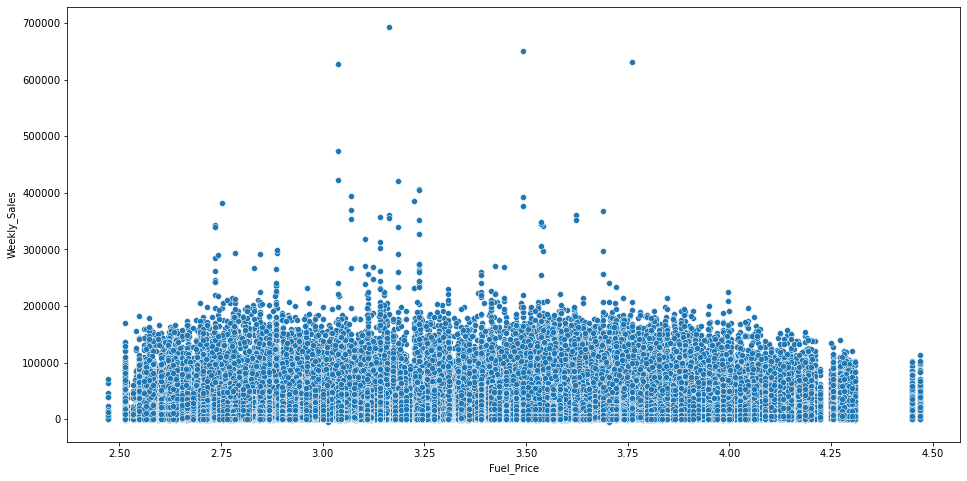

In [20]:
# Let's figure out week variables

# Drawing a scatterplot for 'Fuel Price' which showed the lowest correlation (0.0001)

plt.figure(figsize = (16,8))
sns.scatterplot(train_complete['Fuel_Price'], train_complete['Weekly_Sales'])

# According to the below plot, it looks like no strong relationship between 'Fuel Price' and 'Weekly Sales'

In [21]:
# Training the model after droping 'Fuel Price' as it showed very week relationship with our response variable.

train_model = train_complete.drop(columns = ['Fuel_Price','Weekly_Sales','Date_x', 'Store_Date','Store_y','Date_y','Type'])

model = RandomForestRegressor(n_jobs = -1, random_state = 42)
model.fit(train_model, train['Weekly_Sales'])

train_prediction = model.predict(train_model)
WMAE(train, train_prediction)

# WMAE after dropping the column is 511.84. It is lower than WMAE for baseline model (519.61)

511.8423389749248

/Users/kookhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

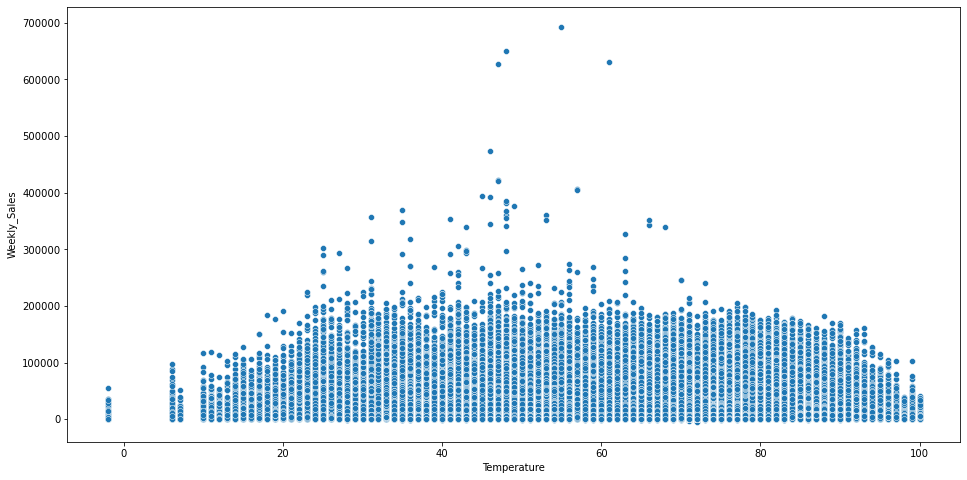

In [22]:
# Drawing a scatterplot for 'Temperature' as it also showed the second lowest correlation (0.0002)

plt.figure(figsize = (16,8))
sns.scatterplot(round(train_complete['Temperature'],0), train_complete['Weekly_Sales'])

# The below plot shows 'Temperature' also does not have strong relationship with 'Weekly Sales'

In [23]:
# Training the model after droping 'Temperature' and 'Fuel Price'.

train_model = train_complete.drop(columns = ['Temperature','Fuel_Price','Weekly_Sales','Date_x', 'Store_Date','Store_y','Date_y','Type'])

model = RandomForestRegressor(n_jobs = -1, random_state = 42)
model.fit(train_model, train['Weekly_Sales'])

train_prediction = model.predict(train_model)
WMAE(train, train_prediction)

# Now, our WMAE is 489.14. Accuracy of the model is improved again after dropping 'Temperature' column.

489.1351745193572

/Users/kookhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='Weekly_Sales'>

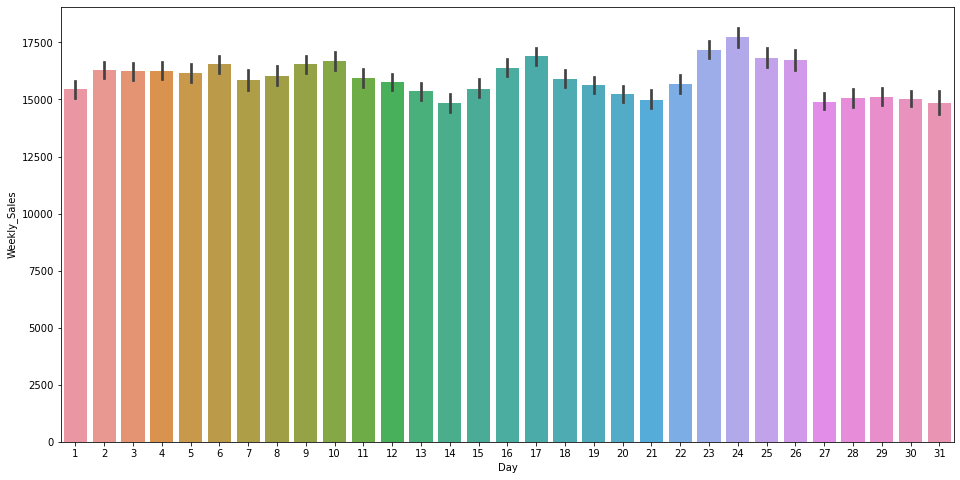

In [24]:
# Drawing a box plot for 'Day' column

plt.figure(figsize = (16,8))
sns.barplot(train_complete['Day'], train_complete['Weekly_Sales'])

# Sales varies in each day, and it seems 24th is generally showing biggest sales during a month.
# As it is showing some trends, dropping 'Day' column may not help to improve the model.

In [25]:
# Training the model after droping 'Day', 'Temperature' and 'Fuel Price'.

train_model = train_complete.drop(columns = ['Day','Temperature','Fuel_Price','Weekly_Sales','Date_x', 'Store_Date','Store_y','Date_y','Type'])

model = RandomForestRegressor(n_jobs = -1, random_state = 42)
model.fit(train_model, train['Weekly_Sales'])

train_prediction = model.predict(train_model)
WMAE(train, train_prediction)

# WMAE increased after dropping 'Day' column as I suspected. We should keep this column in our dataset

518.9611204746637

/Users/kookhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Weekly_Sales'>

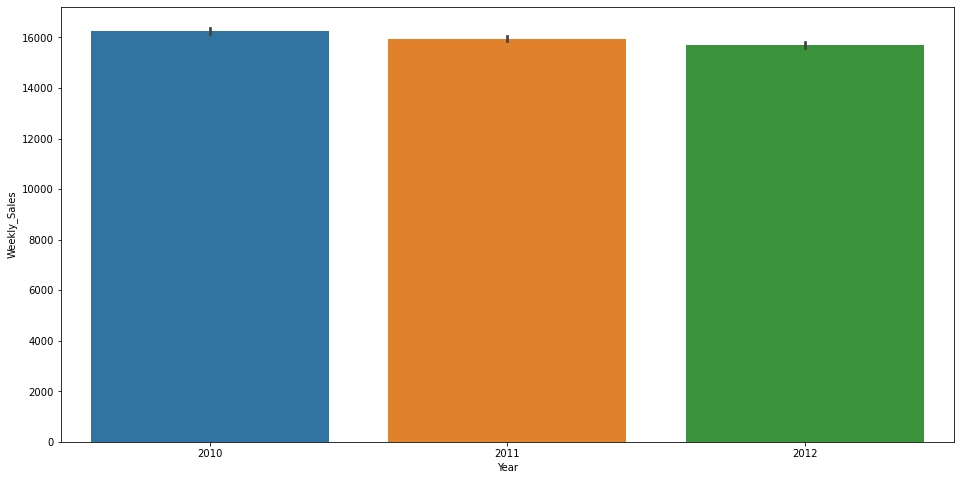

In [26]:
# Drawing a box plot for 'Year' column

plt.figure(figsize = (16,8))
sns.barplot(train_complete['Year'], train_complete['Weekly_Sales'])

# Difference between each year's sales looks like small, but still, there is diffrence.
# Let's test that dropping this column improves the model or not

In [27]:
# Training the model after droping 'Year', 'Temperature' and 'Fuel Price'.

train_model = train_complete.drop(columns = ['Year','Temperature','Fuel_Price','Weekly_Sales','Date_x', 'Store_Date','Store_y','Date_y','Type'])

model = RandomForestRegressor(n_jobs = -1, random_state = 42)
model.fit(train_model, train['Weekly_Sales'])

train_prediction = model.predict(train_model)
WMAE(train, train_prediction)

# WMAE significantly increased after dropping 'Year'. 
# This column has great influence in the model and should not be dropped. 

627.2359021808026

/Users/kookhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

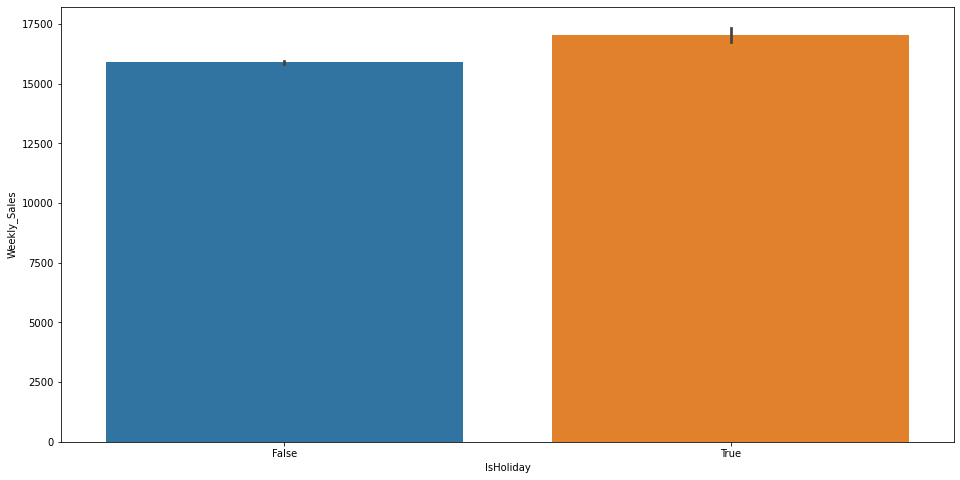

In [28]:
# Drawing a box plot for 'IsHoliday' column

plt.figure(figsize = (16,8))
sns.barplot(train_complete['IsHoliday'], train_complete['Weekly_Sales'])

# Below plot shows that more sales occured during holiday period

In [14]:
# Training the model after dropping 'IsHoliday', 'Temperature' and 'Fuel Price'.

train_model = train_complete.drop(columns = ['IsHoliday','Temperature','Fuel_Price','Weekly_Sales','Date_x', 'Store_Date','Store_y','Date_y','Type'])

model = RandomForestRegressor(n_jobs = -1, random_state = 42)
model.fit(train_model, train['Weekly_Sales'])

train_prediction = model.predict(train_model)
WMAE(train, train_prediction)

# Suprizingly, WMAE is slightly decreased after dropping 'IsHoliday' column.
# I guess this happened because 'Week' column provides mored detailed information 
# about how sales varies between holiday weeks and non-holiday weeks.

# From above evaluations, dropping 'IsHoliday','Temperature','Fuel_Price' provided the best performance.

487.52333407094244

In [15]:
# Dropping same columns from test dataset

test_model = test_complete.drop(columns=['IsHoliday','Temperature','Fuel_Price','Date_x', 'Store_Date','Store_y','Date_y','Type'])
test_model.isnull().sum()

Store_x    0
Dept       0
Year       0
Month      0
Week       0
Day        0
Size       0
Type_n     0
dtype: int64

In [40]:
# Hyperparameter Optimization

# Function for parameter searching

def param_searcher(**args):
    model = RandomForestRegressor(n_jobs = -1, random_state = 42, **args)
    model.fit(train_model, train['Weekly_Sales'])
    prediction = model.predict(train_model)
    return WMAE(train, prediction)

# searching for best 'n_estimators'

param_result_n = {}
param_range = list(range(70,210,10))

for p in param_range:
    param_result_n[p] = param_searcher(n_estimators = p)

param_result_n


{70: 490.81545119315143,
 80: 490.07396675113955,
 90: 489.1337491461204,
 100: 487.5233340709425,
 110: 486.75625506423876,
 120: 485.8697145484629,
 130: 485.49745619556484,
 140: 485.25229933851614,
 150: 485.01955337563754,
 160: 484.96790816370924,
 170: 484.60692092643467,
 180: 484.3552387214449,
 190: 484.2697691864023,
 200: 484.0525736503496}

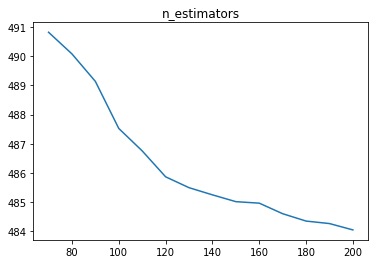

In [41]:
plt.plot(param_result_n.keys(), param_result_n.values())
plt.title("n_estimators")
plt.show()

# Seems like we can decrease WMAE more if we increase 'n_estimator' to over 200

In [47]:
# Additioanl hyperparamerter searching for 'n_estimators'

param_result_n2 = {}
param_range2 = list(range(200,510,50))

for p in param_range2:
    param_result_n2[p] = param_searcher(n_estimators = p)

param_result_n2

{200: 484.0525736503496,
 250: 483.5230643771541,
 300: 483.3252636436051,
 350: 483.00615170606926,
 400: 482.9654404992737,
 450: 482.7806971763035,
 500: 482.62595794910845}

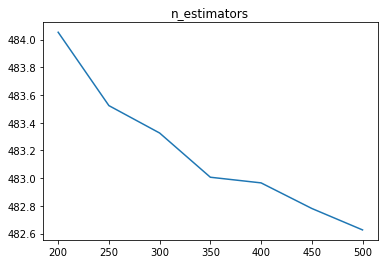

In [48]:
plt.plot(param_result_n2.keys(), param_result_n2.values())
plt.title("n_estimators")
plt.show()

# WMAE drops as 'n_estimators' increases. From this search, 500 n_estimators showing the best accuracy

In [65]:
# Searching for best 'max_depth'

param_range = list(range(10,70,10))

param_result_d = {}
for p in param_range:
    param_result_d[p] = param_searcher(max_depth = p)

param_result_d

{10: 4310.519279020526,
 20: 797.081347732893,
 30: 489.4058257967909,
 40: 487.76806693655567,
 50: 487.5233340709425,
 60: 487.5233340709425}

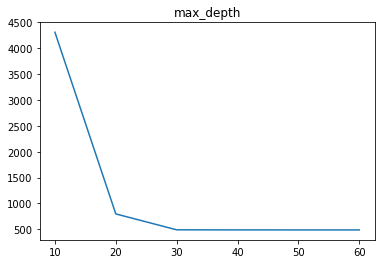

In [66]:
plt.plot(param_result_d.keys(), param_result_d.values())
plt.title("max_depth")
plt.show()

# WMAE reaches at the minimum point when 'max_depth' is over 50

In [16]:
# Applying best number for the parameters and training the model

model = RandomForestRegressor(n_jobs = -1, n_estimators = 500, max_depth = 50, random_state = 42)
model.fit(train_model, train['Weekly_Sales'])

RandomForestRegressor(max_depth=50, n_estimators=500, n_jobs=-1,
                      random_state=42)

In [17]:
# Importance for each column

importance = pd.DataFrame({'columns': train_model.columns, 'importance': model.feature_importances_})
importance.sort_values(by = 'importance')

,columns,importance
2,Year,0.005321
3,Month,0.008089
5,Day,0.012881
7,Type_n,0.014527
4,Week,0.047051
0,Store_x,0.073582
6,Size,0.208583
1,Dept,0.629966


In [19]:
# WMAE calculation for model evaluation

WMAE(train, train_prediction) 

482.62595794910845

In [18]:
# RMSE calculation 

from sklearn.metrics import mean_squared_error

train_prediction = model.predict(train_model)
RMSE = mean_squared_error(train['Weekly_Sales'], train_prediction)**0.5
RMSE_mean_sales = RMSE / train['Weekly_Sales'].mean() * 100

print(f"RMSE for this model is {round(RMSE,2)}, and {round(RMSE_mean_sales,2)}% of deviation can be shown in weekly sales prediction in average")

RMSE for this model is 1032.86, and 6.46% of deviation can be shown in weekly sales prediction in average


In [20]:
# Prediction for test data by using the trained model

prediction = model.predict(test_model)
len(prediction)

115064

In [21]:
# Creating final submission file

sub = pd.read_csv('sampleSubmission.csv.zip')
sub['Weekly_Sales'] = prediction
sub.to_csv("walmart_submission_final.csv", index=False)